<a href="https://colab.research.google.com/github/dylanahola/Chess_Learning_Algorithm/blob/main/ChessProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Week 7/gamesdata.excel.csv')
df.head(10)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
5,MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
7,RVN0N3VK,False,1.503680e+12,1.503680e+12,9,resign,black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5
8,dwF3DJHO,True,1.503510e+12,1.503510e+12,66,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6
9,afoMwnLg,True,1.503440e+12,1.503440e+12,119,mate,white,10+0,daniel_likes_chess,1381,mirco25,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4


In [4]:
#I am a huge chess nerd and I found this cool data set and would like to try and make a model to predict the winner of games based on the data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [6]:
df.duplicated().any()

True

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.dropna(inplace = True)

In [9]:
#I understand this feature in a chess sense but will need to find a way to clean it while keeping the useful information
df['increment_code']

0         15+2
1         5+10
2         5+10
3         20+0
4         30+3
         ...  
20053    10+10
20054     10+0
20055     10+0
20056     10+0
20057     10+0
Name: increment_code, Length: 19629, dtype: object

In [10]:
#While cleaning the data I also decided to drop the columns that list the game or player's ID since all of the data entries in each are unique I can't see it being useful in making predictions.
df.drop(columns = ['id','white_id','black_id', 'rated'], inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19629 entries, 0 to 20057
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   created_at      19629 non-null  float64
 1   last_move_at    19629 non-null  float64
 2   turns           19629 non-null  int64  
 3   victory_status  19629 non-null  object 
 4   winner          19629 non-null  object 
 5   increment_code  19629 non-null  object 
 6   white_rating    19629 non-null  int64  
 7   black_rating    19629 non-null  int64  
 8   moves           19629 non-null  object 
 9   opening_eco     19629 non-null  object 
 10  opening_name    19629 non-null  object 
 11  opening_ply     19629 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.9+ MB


In [12]:
test_df = df[df['opening_name'] == 'Sicilian Defense']

In [13]:
test_df.head()

,created_at,last_move_at,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
32,1.502780e+12,1.502780e+12,54,resign,white,10+10,1203,1019,e4 c5 Nf3 d5 exd5 Qxd5 Nc3 Qe6+ Qe2 Qxe2+ Bxe2...,B27,Sicilian Defense,3
167,1.503450e+12,1.503450e+12,107,resign,white,10+10,1885,1856,e4 c5 Nf3 d6 Nc3 a6 a3 Nf6 Bc4 e6 d3 Nc6 Ba2 B...,B50,Sicilian Defense,4
174,1.503120e+12,1.503120e+12,105,outoftime,white,10+0,1895,1859,e4 c5 Nf3 d6 Bc4 Nf6 d3 a6 a3 g6 b4 Bg7 Bb2 O-...,B50,Sicilian Defense,4
176,1.503090e+12,1.503090e+12,144,outoftime,draw,10+0,1866,1843,e4 c5 Nf3 d6 g3 Nf6 d3 Nc6 Bg2 g6 O-O Bg7 Nc3 ...,B50,Sicilian Defense,4
191,1.501040e+12,1.501040e+12,136,resign,black,15+0,1800,1826,e4 c5 Qf3 Nc6 c3 d6 Bc4 Nf6 Bb5 Bg4 Bxc6+ bxc6...,B20,Sicilian Defense,2


In [14]:
df['opening_eco'].value_counts()

A00    992
C00    824
D00    719
B01    707
C41    671
      ... 
E44      1
B62      1
D48      1
E47      1
E35      1
Name: opening_eco, Length: 365, dtype: int64

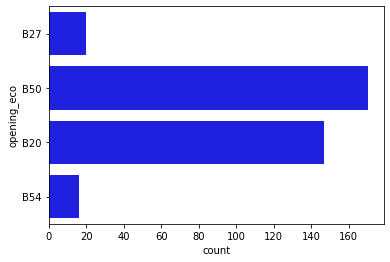

In [15]:
ax  =sns.countplot(y = 'opening_eco', data = test_df, palette=['blue'])


In [16]:
b27_df = df[df['opening_eco'] == 'B27']

In [17]:
b27_df.head()

,created_at,last_move_at,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
5,1.504240e+12,1.504240e+12,5,draw,draw,10+0,1250,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
32,1.502780e+12,1.502780e+12,54,resign,white,10+10,1203,1019,e4 c5 Nf3 d5 exd5 Qxd5 Nc3 Qe6+ Qe2 Qxe2+ Bxe2...,B27,Sicilian Defense,3
158,1.503690e+12,1.503690e+12,125,resign,white,15+0,1851,1918,e4 c5 Nf3 g6 Nc3 Bg7 Bb5 a6 Be2 Nc6 O-O b5 a3 ...,B27,Sicilian Defense: Hyperaccelerated Dragon,4
219,1.503510e+12,1.503510e+12,44,mate,black,15+1,1274,1534,e4 e5 Nf3 c5 d4 Nc6 dxe5 d6 exd6 Bxd6 Bg5 Nf6 ...,B27,Sicilian Defense: Jalalabad Variation,4
292,1.502500e+12,1.502500e+12,72,resign,white,15+15,1611,1478,Nf3 c5 e4 Qc7 Nc3 a6 d4 e6 d5 e5 a4 d6 Nd2 Nf6...,B27,Sicilian Defense: Quinteros Variation,4


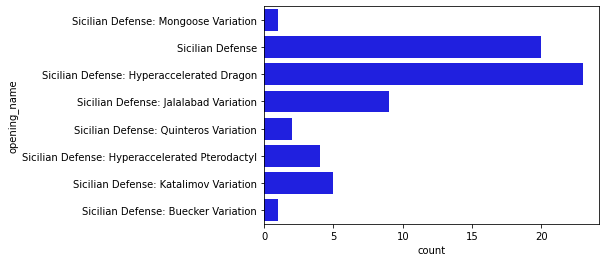

In [18]:
ax  =sns.countplot(y = 'opening_name', data = b27_df, palette=['blue'])

In [19]:
b50_df = df[df['opening_eco'] == 'B50']

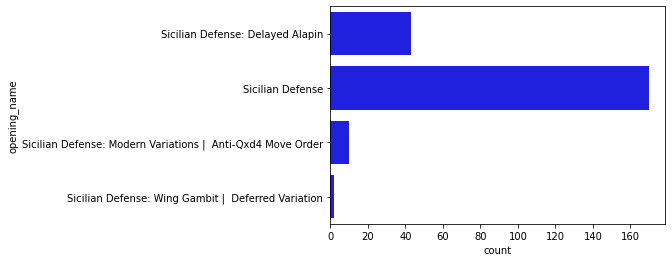

In [20]:
ax  =sns.countplot(y = 'opening_name', data = b50_df, palette=['blue'])

In [21]:
#From the data exploration above I found that although both the opening_eco and opening_name column provide a great deal of information, I'll need to find a cleaner way to represent that data.

In [23]:
df['Letter'] = df['opening_eco'].str[0]
df['Letter']

0        D
1        B
2        C
3        D
4        C
        ..
20053    A
20054    A
20055    D
20056    B
20057    D
Name: Letter, Length: 19629, dtype: object

In [24]:
df['Number'] = df['opening_eco'].str.slice(1,3)
df['Number']

0        10
1        00
2        20
3        02
4        41
         ..
20053    80
20054    41
20055    00
20056    07
20057    00
Name: Number, Length: 19629, dtype: object

In [25]:
df['Number'] = df['Number'].astype(int)

In [26]:
df['Number']

0        10
1         0
2        20
3         2
4        41
         ..
20053    80
20054    41
20055     0
20056     7
20057     0
Name: Number, Length: 19629, dtype: int64

In [27]:
#E60-E99 King's Indian defence

In [28]:
conditions = [
              (df['Letter'] == 'E') & (df['Number'] >= 60) & (df['Number'] <= 99),
              (df['Letter'] == 'E') & (df['Number'] >= 20) & (df['Number'] <= 59),
              (df['Letter'] == 'E') & (df['Number'] >= 12) & (df['Number'] <= 19),
              (df['Letter'] == 'E') & (df['Number'] == 11),
              (df['Letter'] == 'E') & (df['Number'] == 10),
              (df['Letter'] == 'E') & (df['Number'] >= 1) & (df['Number'] <= 9),
              (df['Letter'] == 'E') & (df['Number'] == 0),
              (df['Letter'] == 'D') & (df['Number'] >= 80) & (df['Number'] <= 99),
              (df['Letter'] == 'D') & (df['Number'] >= 70) & (df['Number'] <= 79),
              (df['Letter'] == 'D') & (df['Number'] >= 50) & (df['Number'] <= 69),
              (df['Letter'] == 'D') & (df['Number'] >= 43) & (df['Number'] <= 49),
              (df['Letter'] == 'D') & (df['Number'] >= 30) & (df['Number'] <= 42),
              (df['Letter'] == 'D') & (df['Number'] >= 20) & (df['Number'] <= 29),
              (df['Letter'] == 'D') & (df['Number'] >= 17) & (df['Number'] <= 19),
              (df['Letter'] == 'D') & (df['Number'] == 16),
              (df['Letter'] == 'D') & (df['Number'] >= 10) & (df['Number'] <= 15),
              (df['Letter'] == 'D') & (df['Number'] >= 7) & (df['Number'] <= 9),
              (df['Letter'] == 'D') & (df['Number'] == 6),
              (df['Letter'] == 'D') & (df['Number'] >= 4) & (df['Number'] <= 5),
              (df['Letter'] == 'D') & (df['Number'] == 3),
              (df['Letter'] == 'D') & (df['Number'] == 2),
              (df['Letter'] == 'D') & (df['Number'] == 1),
              (df['Letter'] == 'D') & (df['Number'] == 0),
              (df['Letter'] == 'C') & (df['Number'] >= 60) & (df['Number'] <= 99),
              (df['Letter'] == 'C') & (df['Number'] >= 55) & (df['Number'] <= 59),
              (df['Letter'] == 'C') & (df['Number'] >= 53) & (df['Number'] <= 54),
              (df['Letter'] == 'C') & (df['Number'] >= 51) & (df['Number'] <= 52),
              (df['Letter'] == 'C') & (df['Number'] == 50),
              (df['Letter'] == 'C') & (df['Number'] >= 47) & (df['Number'] <= 49),
              (df['Letter'] == 'C') & (df['Number'] == 46),
              (df['Letter'] == 'C') & (df['Number'] == 45),
              (df['Letter'] == 'C') & (df['Number'] == 44),
              (df['Letter'] == 'C') & (df['Number'] >= 42) & (df['Number'] <= 43),
              (df['Letter'] == 'C') & (df['Number'] == 41),
              (df['Letter'] == 'C') & (df['Number'] == 40),
              (df['Letter'] == 'C') & (df['Number'] >= 30) & (df['Number'] <= 39),
              (df['Letter'] == 'C') & (df['Number'] >= 25) & (df['Number'] <= 29),
              (df['Letter'] == 'C') & (df['Number'] >= 23) & (df['Number'] <= 24),
              (df['Letter'] == 'C') & (df['Number'] >= 21) & (df['Number'] <= 22),
              (df['Letter'] == 'C') & (df['Number'] == 20),
              (df['Letter'] == 'C') & (df['Number'] >= 00) & (df['Number'] <= 19),
              (df['Letter'] == 'B') & (df['Number'] >= 20) & (df['Number'] <= 99),
              (df['Letter'] == 'B') & (df['Number'] >= 10) & (df['Number'] <= 19),
              (df['Letter'] == 'B') & (df['Number'] >= 7) & (df['Number'] <= 9),
              (df['Letter'] == 'B') & (df['Number'] == 6),
              (df['Letter'] == 'B') & (df['Number'] >= 2) & (df['Number'] <= 5),
              (df['Letter'] == 'B') & (df['Number'] == 1),
              (df['Letter'] == 'B') & (df['Number'] == 0),
              (df['Letter'] == 'A') & (df['Number'] >= 80) & (df['Number'] <= 99),
              (df['Letter'] == 'A') & (df['Number'] >= 60) & (df['Number'] <= 79),
              (df['Letter'] == 'A') & (df['Number'] >= 57) & (df['Number'] <= 59),
              (df['Letter'] == 'A') & (df['Number'] == 56),
              (df['Letter'] == 'A') & (df['Number'] >= 53) & (df['Number'] <= 55),
              (df['Letter'] == 'A') & (df['Number'] >= 51) & (df['Number'] <= 52),
              (df['Letter'] == 'A') & (df['Number'] == 50),
              (df['Letter'] == 'A') & (df['Number'] >= 48) & (df['Number'] <= 49),
              (df['Letter'] == 'A') & (df['Number'] == 47),
              (df['Letter'] == 'A') & (df['Number'] >= 45) & (df['Number'] <= 46),
              (df['Letter'] == 'A') & (df['Number'] >= 43) & (df['Number'] <= 44),
              (df['Letter'] == 'A') & (df['Number'] == 42),
              (df['Letter'] == 'A') & (df['Number'] >= 40) & (df['Number'] <= 41),
              (df['Letter'] == 'A') & (df['Number'] >= 10) & (df['Number'] <= 39),
              (df['Letter'] == 'A') & (df['Number'] >= 4) & (df['Number'] <= 9),
              (df['Letter'] == 'A') & (df['Number'] >= 2) & (df['Number'] <= 3),
              (df['Letter'] == 'A') & (df['Number'] == 1),
              (df['Letter'] == 'A') & (df['Number'] == 0),
              

]

In [29]:
values = ['E60-E99 Kings Indian defence', 'E20-E59 Nimzo-Indian defence', ' E12-E19 Queens Indian defence',' E11 Bogo-Indian defence', 'E10 Queens pawn game',
          'E01-E09 Catalan, closed', 'E00 Queens pawn game', 'D80-D99 Gruenfeld defence', 'D70-D79 Neo-Gruenfeld defence', 'D50-D69 Queens Gambit Declined, 4.Bg5',
          'D43-D49 Queens Gambit Declined semi-Slav', 'D30-D42 Queens gambit declined', 'D20-D29 Queens gambit accepted', 'D17-D19 Queens Gambit Declined Slav, Czech defence',
          'D16 Queens Gambit Declined Slav accepted, Alapin variation', 'D10-D15 Queens Gambit Declined Slav defence', 'D07-D09 Queens Gambit Declined, Chigorin defence',
          'D06 Queens Gambit', 'D04-D05 Queens pawn game', 'D03 Torre attack (Tartakower variation)', 'D02 Queens pawn game', 'D01 Richter-Veresov attack', 'D00 Queens pawn game',
          'C60-C99 Ruy Lopez (Spanish opening)', 'C55-C59 Two knights defence', 'C53-C54 Giuoco Piano', 'C51-C52 Evans gambit', 'C50 Kings pawn game', 'C47-C49 Four knights, Scotch variation',
          'C46 Three knights game', 'C45 Scotch game', 'C44 Kings pawn game', 'C42-C43 Petrovs defence', 'C41 Philidors defence', 'C40 Kings knight opening', 'C30-C39 Kings gambit', 'C25-C29 Vienna game',
          'C23-C24 Bishops opening', 'C21-C22 Centre game', 'C20 Kings pawn game', 'C00-C19 French defence', 'B20-B99 Sicilian defence', 'B10-B19 Caro-Kann defence', 'B07-B09 Pirc defence', 'B06 Robatsch (modern) defence',
          'B02-B05 Alekhines defence', 'B01 Scandinavian (centre counter) defence', 'B00 Kings pawn opening', 'A80-A99 Dutch', 'A60-A79 Benoni defence', 'A57-A59 Benko gambit', 'A56 Benoni defence', 'A53-A55 Old Indian defence',
          'A51-A52 Budapest defence', 'A50 Queens pawn game', 'A48-A49 Kings Indian, East Indian defence', 'A47 Queens Indian defence', 'A45-A46 Queens pawn game', 'A43-A44 Old Benoni defence', 'A42 Modern defence, Averbakh system',
          'A40-A41 Queens pawn', 'A10-A39 English opening', 'A04-A09 Reti opening', 'A02-A03 Birds opening', 'A01 Nimzovich-Larsen attack', 'A00 Polish (Sokolsky) opening'
]

In [30]:
df['ComboName'] = np.select(conditions, values)
df[df['Letter']== 'E']

,created_at,last_move_at,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,Letter,Number,ComboName
63,1.503970e+12,1.503970e+12,25,resign,white,8+12,1939,1581,d4 Nf6 c4 e6 Nf3 c5 d5 exd5 cxd5 c4 Nc3 Bb4 Bg...,E10,Blumenfeld Countergambit #2,6,E,10,E10 Queens pawn game
139,1.503130e+12,1.503130e+12,58,mate,black,15+15,1335,1233,d4 Nf6 c4 e6 Nc3 Bb4 Bd2 O-O e3 d5 cxd5 exd5 Q...,E20,Nimzo-Indian Defense,6,E,20,E20-E59 Nimzo-Indian defence
145,1.503090e+12,1.503090e+12,43,mate,white,10+0,1550,1225,d4 Nf6 c4 e6 Nf3 Bb4+ Bd2 Bxd2+ Nbxd2 O-O e4 d...,E11,Bogo-Indian Defense: Exchange Variation,8,E,11,E11 Bogo-Indian defence
165,1.503460e+12,1.503460e+12,69,outoftime,white,8+0,1855,1858,Nh3 d5 g3 Nf6 Bg2 c5 f4 e6 Nf2 Nc6 d3 d4 e4 e5...,E00,Amar Opening,1,E,0,E00 Queens pawn game
180,1.501980e+12,1.501980e+12,158,mate,black,6+6,1835,1865,d4 Nf6 Nf3 e6 c4 c5 e3 cxd4 exd4 d5 c5 Be7 Bb5...,E10,Blumenfeld Countergambit #2,6,E,10,E10 Queens pawn game
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19977,1.496948e+12,1.496954e+12,91,resign,white,30+30,2100,1840,e4 g6 d4 Bg7 c4 d6 Nc3 Nf6 Nf3 O-O Be2 c5 d5 B...,E91,King's Indian Defense: Orthodox Variation,11,E,91,E60-E99 Kings Indian defence
19982,1.502366e+12,1.502371e+12,77,resign,white,30+30,2048,1801,d4 Nf6 Nf3 e6 c4 b6 g3 Bb7 Bg2 Be7 O-O O-O Nc3...,E17,Queen's Indian Defense: Classical Variation | ...,13,E,17,E12-E19 Queens Indian defence
19998,1.498509e+12,1.498509e+12,87,outoftime,white,5+5,1998,1920,d4 Nf6 Nf3 d5 c4 e6 Nc3 Bb4 Bg5 h6 Bxf6 Qxf6 e...,E20,Nimzo-Indian Defense: Ragozin Variation,8,E,20,E20-E59 Nimzo-Indian defence
20021,1.504283e+12,1.504284e+12,56,resign,black,10+0,1876,1913,c4 Nf6 d4 g6 Nc3 Bg7 Nf3 O-O g3 d6 Bg2 Nbd7 b4...,E67,King's Indian Defense: Fianchetto Variation | ...,12,E,67,E60-E99 Kings Indian defence


In [31]:
#I decided that the best way to clean the opening_eco and opening_name columns was to transfer their information into a new column. In order to do so I created the 'letter' and 'number' columns to produce the 'comboname' column. 
#The combo name contains all of the valuable information of the name and eco columns while reducing the size and changing them from categorical. Now that 'comboname' column is made I'm able to drop the 'letter' and 'number columns as well.

In [32]:
df['increment_code']

0         15+2
1         5+10
2         5+10
3         20+0
4         30+3
         ...  
20053    10+10
20054     10+0
20055     10+0
20056     10+0
20057     10+0
Name: increment_code, Length: 19629, dtype: object

In [33]:
df['time'] = df['increment_code'].str.slice(0,2)

In [34]:
df['time'] = df['time'].replace(['5+'], '5')
df['time'] = df['time'].replace(['8+'], '8')
df['time'] = df['time'].replace(['7+'], '7')
df['time'] = df['time'].replace(['9+'], '9')
df['time'] = df['time'].replace(['6+'], '6')
df['time'] = df['time'].replace(['4+'], '4')
df['time'] = df['time'].replace(['3+'], '3')
df['time'] = df['time'].replace(['2+'], '2')
df['time'] = df['time'].replace(['0+'], '0')
df['time'] = df['time'].replace(['1+'], '1')

In [35]:
df['time'].value_counts()

10    9245
15    3325
5     1772
20     927
8      906
30     728
7      623
25     318
9      252
12     234
18     179
6      175
45     149
60      98
11      98
13      74
14      70
4       65
3       57
2       54
16      49
0       42
17      39
40      37
1       31
19      27
35      26
90      26
29       2
21       1
Name: time, dtype: int64

In [36]:
df['time'] = df['time'].astype(int)

In [ ]:
#I also simplified the increment_code and turned it into the 'time' column and also changed its data type into an integer.

In [37]:
df.drop(columns= ['opening_eco', 'opening_name', 'Letter', 'Number', 'created_at', 'last_move_at', 'moves', 'victory_status', 'increment_code'], inplace = True)

In [38]:
df['winner'].value_counts()

white    9792
black    8919
draw      918
Name: winner, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19629 entries, 0 to 20057
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   turns         19629 non-null  int64 
 1   winner        19629 non-null  object
 2   white_rating  19629 non-null  int64 
 3   black_rating  19629 non-null  int64 
 4   opening_ply   19629 non-null  int64 
 5   ComboName     19629 non-null  object
 6   time          19629 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.2+ MB


In [40]:
df['ComboName']

0        D10-D15 Queens Gambit Declined Slav defence
1                             B00 Kings pawn opening
2                                C20 Kings pawn game
3                               D02 Queens pawn game
4                              C41 Philidors defence
                            ...                     
20053                                  A80-A99 Dutch
20054                            A40-A41 Queens pawn
20055                           D00 Queens pawn game
20056                           B07-B09 Pirc defence
20057                           D00 Queens pawn game
Name: ComboName, Length: 19629, dtype: object

In [41]:
# I successfully took the information from the opening_eco column and the opening_name columns and combined them into one column. Next I'll have to handle the categorical variables using dummy columns. This will produce a lot of features.
#My plan is to use dummy columns to hanlde the categorical values then use PCA for data reduction, minimizing the problem of the increase in features.


In [42]:
df_dummies = pd.get_dummies(df, columns = ['ComboName'], drop_first= True)
df_dummies.head(1)

,turns,winner,white_rating,black_rating,opening_ply,time,ComboName_ E12-E19 Queens Indian defence,ComboName_A00 Polish (Sokolsky) opening,ComboName_A01 Nimzovich-Larsen attack,ComboName_A02-A03 Birds opening,ComboName_A04-A09 Reti opening,ComboName_A10-A39 English opening,ComboName_A40-A41 Queens pawn,"ComboName_A42 Modern defence, Averbakh system",ComboName_A43-A44 Old Benoni defence,ComboName_A45-A46 Queens pawn game,ComboName_A47 Queens Indian defence,"ComboName_A48-A49 Kings Indian, East Indian defence",ComboName_A50 Queens pawn game,ComboName_A51-A52 Budapest defence,ComboName_A53-A55 Old Indian defence,ComboName_A56 Benoni defence,ComboName_A57-A59 Benko gambit,ComboName_A60-A79 Benoni defence,ComboName_A80-A99 Dutch,ComboName_B00 Kings pawn opening,ComboName_B01 Scandinavian (centre counter) defence,ComboName_B02-B05 Alekhines defence,ComboName_B06 Robatsch (modern) defence,ComboName_B07-B09 Pirc defence,ComboName_B10-B19 Caro-Kann defence,ComboName_B20-B99 Sicilian defence,ComboName_C00-C19 French defence,ComboName_C20 Kings pawn game,ComboName_C21-C22 Centre game,ComboName_C23-C24 Bishops opening,ComboName_C25-C29 Vienna game,ComboName_C30-C39 Kings gambit,ComboName_C40 Kings knight opening,ComboName_C41 Philidors defence,ComboName_C42-C43 Petrovs defence,ComboName_C44 Kings pawn game,ComboName_C45 Scotch game,ComboName_C46 Three knights game,"ComboName_C47-C49 Four knights, Scotch variation",ComboName_C50 Kings pawn game,ComboName_C51-C52 Evans gambit,ComboName_C53-C54 Giuoco Piano,ComboName_C55-C59 Two knights defence,ComboName_C60-C99 Ruy Lopez (Spanish opening),ComboName_D00 Queens pawn game,ComboName_D01 Richter-Veresov attack,ComboName_D02 Queens pawn game,ComboName_D03 Torre attack (Tartakower variation),ComboName_D04-D05 Queens pawn game,ComboName_D06 Queens Gambit,"ComboName_D07-D09 Queens Gambit Declined, Chigorin defence",ComboName_D10-D15 Queens Gambit Declined Slav defence,"ComboName_D16 Queens Gambit Declined Slav accepted, Alapin variation","ComboName_D17-D19 Queens Gambit Declined Slav, Czech defence",ComboName_D20-D29 Queens gambit accepted,ComboName_D30-D42 Queens gambit declined,ComboName_D43-D49 Queens Gambit Declined semi-Slav,"ComboName_D50-D69 Queens Gambit Declined, 4.Bg5",ComboName_D70-D79 Neo-Gruenfeld defence,ComboName_D80-D99 Gruenfeld defence,ComboName_E00 Queens pawn game,"ComboName_E01-E09 Catalan, closed",ComboName_E10 Queens pawn game,ComboName_E20-E59 Nimzo-Indian defence,ComboName_E60-E99 Kings Indian defence
0,13,white,1500,1191,5,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
#END OF DATA CLEANING START OF MODELING

In [44]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19629 entries, 0 to 20057
Data columns (total 71 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   turns                                                                 19629 non-null  int64 
 1   winner                                                                19629 non-null  object
 2   white_rating                                                          19629 non-null  int64 
 3   black_rating                                                          19629 non-null  int64 
 4   opening_ply                                                           19629 non-null  int64 
 5   time                                                                  19629 non-null  int64 
 6   ComboName_ E12-E19 Queens Indian defence                              19629 non-null  uint8 
 7   Comb

In [45]:
X = df_dummies.loc[:, df_dummies.columns[(df_dummies.columns != 'winner')]]

In [46]:
y = df_dummies.loc[:, 'winner'].values

In [47]:
scaler = StandardScaler()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [49]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
pca = PCA(n_components = 15)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test) 

In [51]:
rfc = RandomForestClassifier(n_estimators=100, bootstrap = True)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
print('Training accuracy:', rfc.score(X_train, y_train))
print('Testing accuracy:', rfc.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy: 0.621638141809291


In [53]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [54]:
print('Training accuracy:', knn.score(X_train, y_train))
print('Testing accuracy:', knn.score(X_test, y_test))

Training accuracy: 0.7091230215338632
Testing accuracy: 0.5493072534637327


In [55]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [56]:
print('Training Accuracy:', gbc.score(X_train, y_train))
print('Testing Accuracy:', gbc.score(X_test, y_test))

Training Accuracy: 0.7146932952924394
Testing Accuracy: 0.6882640586797066


In [57]:
lgbm = LGBMClassifier(learning_rate = 0.5, max_depth = 3, n_estimators = 200, subsample = 1, random_state = 3)
lgbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1, subsample_for_bin=200000, subsample_freq=0)

In [58]:
#n = [25,50,100,200]
#params = {'n_estimators': n, 'max_depth':[3, 4, 6,8], 'learning_rate':[0.1,0.3,0.5], 'subsample':[1,0.5]}
#cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=10, random_state= 3)
#scoregrid = {'Score':'best_score_', 'params' : 'best_params_'}
#lgbmsearch = GridSearchCV(estimator=lgbm ,param_grid=params,n_jobs=-1, cv=cv, refit= True, )
#lgbmsearch.fit(X_train, y_train)
#lgbmsearch.best_params_

In [80]:
print('Training accuracy:', lgbm.score(X_train, y_train))
print('Testing accuracy:', lgbm.score(X_test, y_test))

Training accuracy: 0.8761633041233612
Testing accuracy: 0.8457620211898941


In [ ]:
#After testing several different models and also testing parameters using a grid search (Shown above) I was able to put together a model with 84% accuracy.

In [ ]:
df.info()

In [ ]:
df['winner'].value_counts()

In [ ]:
plt.style.use('seaborn')
plt.bar(df['winner'], df['white_rating']);
plt.bar(df['winner'], df['black_rating']);
plt.title('Match Winner by Player Rating', fontsize = 15);
plt.ylabel("Player Rating", fontsize = 15);
plt.xlabel('Winner of Match', fontsize = 15);

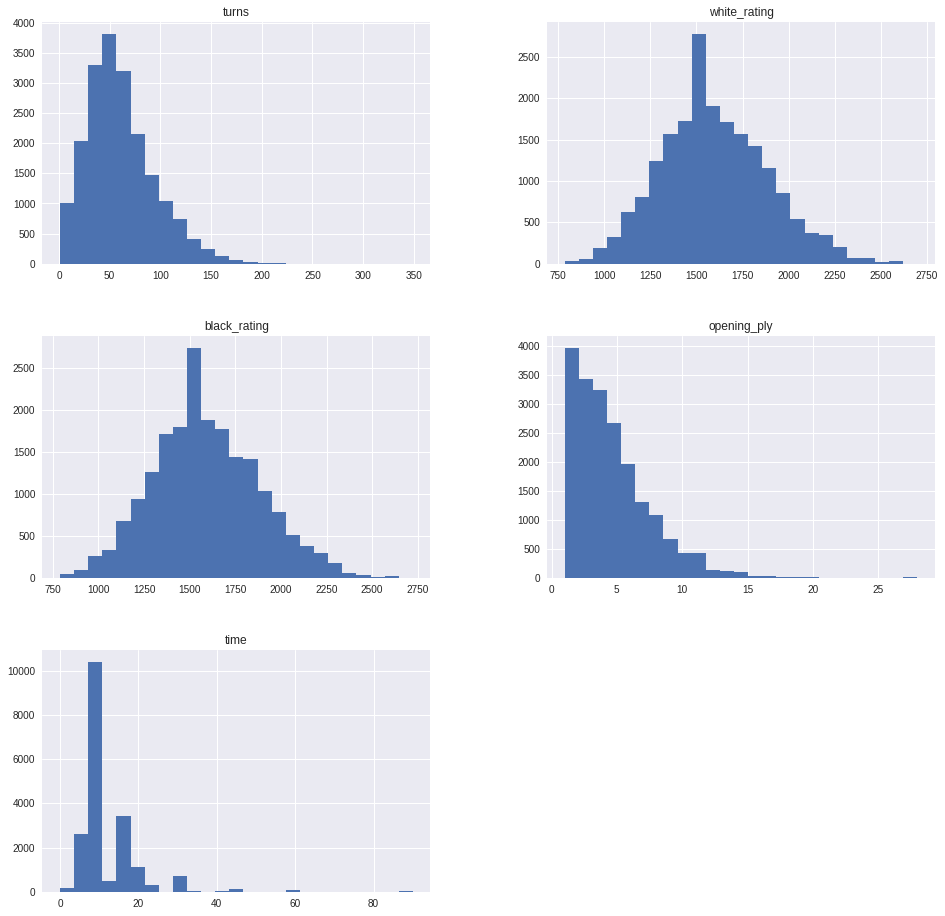

In [81]:
df.loc[:,:].hist(bins=25, figsize= (16,16));

In [ ]:
#I like using histograms as a visualization that helps to gain an overall understanding of the data. This visualization shows the distribution of player ratings, how common each time setting is, and even the amount of turns that most games finish with.

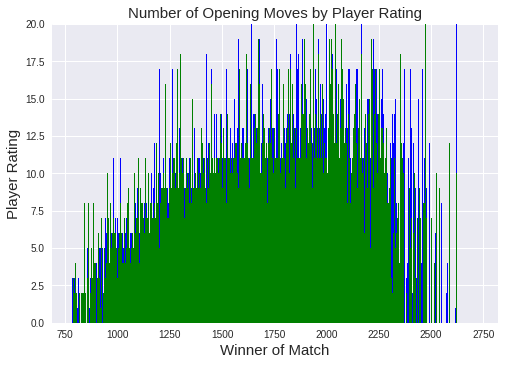

In [82]:
plt.bar(df['white_rating'], df['opening_ply'], color = 'blue', width = 2);
plt.bar(df['black_rating'], df['opening_ply'], color = 'green', width = 2);
plt.title('Number of Opening Moves by Player Rating', fontsize = 15);
plt.ylabel("Player Rating", fontsize = 15);
plt.xlabel('Winner of Match', fontsize = 15);
plt.ylim(bottom = 0, top = 20);

In [ ]:
#This visualization shows that in general, players (both white and black pieces) spend less moves in the opening phase before transitioning into the middle game.
#I think a potential cause of this is that the moire experienced a player is (higher rated) the more they tend to memorize opening theory. Opening theory is sequences of moves in each opening that have the highest probability of producing a win. When two players who but understand opening theory play, they both play the most accurate moves. Resulting in a longer opening.

In [22]:
#Citations:
#https://stackoverflow.com/questions/35552874/get-first-letter-of-a-string-from-column
#https://www.geeksforgeeks.org/get-the-substring-of-the-column-in-pandas-python/
#https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
#https://www.edureka.co/blog/python-list-length/
#I also recieved assistance from Cassandra who was kind enough to help me during office hours. 
